In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder,normalize, scale,MinMaxScaler
from sklearn.ensemble import  RandomForestRegressor,AdaBoostRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from rfpimp import permutation_importances
from sklearn.metrics import r2_score


/home/maksim/ml/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv('/home/maksim/datasets/Почищенный датасет с нормализованным эстимейтом - data_set_last7.csv')

In [5]:
df.columns = [i.replace(' ','_').lower() for i in df.columns]

In [6]:
df

,sale_date,price,author,art,owner,sign,technique,material,nazi,framed,...,month,year,deal_time_(utc),normalized_price,hasfollowers,hasafter,isuntitled,isnumbered,normalized_estimatefrom,normalized_estimateto
0,10.12.2018,93750,willem de kooning,UNTITLED (WOMAN),-,1,oil,paper,0,0,...,12,2018,17:00,91630.99,0,1,1.0,1.0,71268.55,91630.99
1,10.12.2018,52500,willem de kooning,UNTITLED (STILL LIFE),-,1,oil,board,0,0,...,12,2018,17:00,91630.99,0,1,1.0,0.0,71268.55,91630.99
2,05.03.2020,740000,georgia o′keeffe,UNTITLED (ALLIGATOR PEAR IN RED DISH),-,0,oil,canvas,0,0,...,3,2020,15:00,500000.00,0,0,1.0,0.0,300000.00,500000.00
3,10.12.2018,8125,franz kline,UNTITLED,-,1,oil,canvas,0,0,...,12,2018,17:00,8144.98,0,0,1.0,0.0,6108.73,8144.98
4,10.12.2018,40000,franz kline,UNTITLED,-,1,ink,paper,0,0,...,12,2018,17:00,35634.27,0,0,1.0,0.0,25453.05,35634.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14532,27.01.2011,16882500,titian,A SACRA CONVERSAZIONE: THE MADONNA AND CHILD W...,-,0,oil,canvas,0,0,...,1,2011,15:00,22731249.56,1,1,NaN,NaN,17048437.17,22731249.56
14533,30.01.2009,1762500,titian,"PORTRAIT OF AN ADMIRAL, PROBABLY FRANCESCO DUO...",-,0,oil,canvas,0,0,...,1,2009,15:00,2383341.02,1,1,NaN,NaN,1787505.77,2383341.02
14534,10.12.2016,2108750,titian,"PORTRAIT OF TWO BOYS, SAID TO BE MEMBERS OF TH...",-,1,oil,canvas,0,0,...,12,2016,19:00,2010042.04,1,1,NaN,NaN,1340028.03,2010042.04
14535,01.02.2018,2175000,titian,SAINT MARGARET,-,1,oil,canvas,0,0,...,2,2018,23:00,3054366.30,1,1,NaN,NaN,2036244.20,3054366.30


In [7]:
for i in df.columns:
    print(i)

sale_date
price
author
art
owner
sign
technique
material
nazi
framed
size
square_m
currency
estimatefrom
estimateto
exhibitednum
provenancenum
literaturenum
cataloguinglength
time
city
description
tried_url
image
date_of_birth
date_of_death
century
nationality
sex
style
repeat_sale
feature1
feature2
number_of_day
day_of_week
month
year
deal_time_(utc)
normalized_price
hasfollowers
hasafter
isuntitled
isnumbered
normalized_estimatefrom
normalized_estimateto


In [8]:
l = list(df.columns)
l[11] = 'square_m'
df.columns = l

Text(0.5, 0, 'rank')

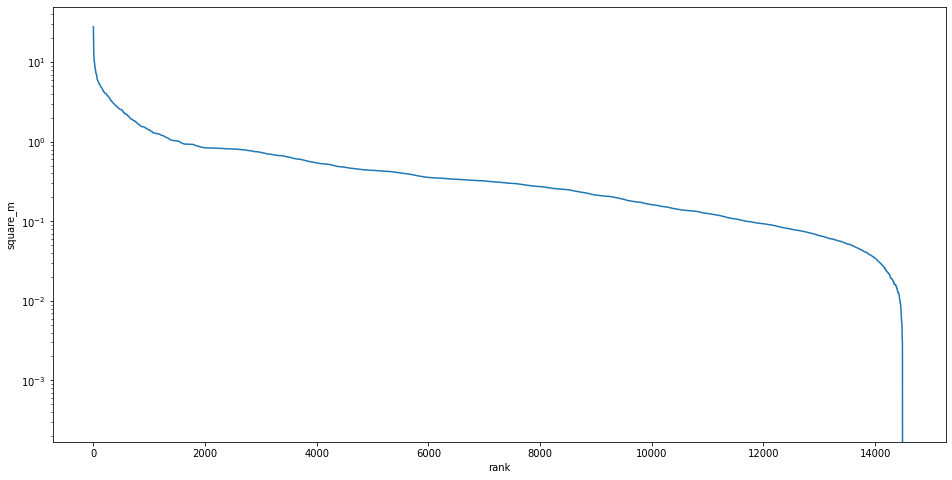

In [9]:
plt.figure(figsize=(16,8))

plt.plot(sorted(df.square_m, reverse=True))
plt.yscale('log')
plt.ylabel('square_m')
plt.xlabel('rank')

In [10]:
model = smf.ols(formula='np.log(normalized_price) ~ C(technique) + C(material) +C(sign) + C(nationality) + square_m + C(hasfollowers) + C(sex) + C(style)', data=df[df.normalized_price != 0.0]).fit()

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[df.square_m > 20])

,sale_date,price,author,art,owner,sign,technique,material,nazi,framed,size,square_m,currency,estimatefrom,estimateto,exhibitednum,provenancenum,literaturenum,cataloguinglength,time,city,description,tried_url,image,date_of_birth,date_of_death,century,nationality,sex,style,repeat_sale,feature1,feature2,number_of_day,day_of_week,month,year,deal_time_(utc),normalized_price,hasfollowers,hasafter,isuntitled,isnumbered,normalized_estimatefrom,normalized_estimateto
1992,14.05.2008,9561000,andy warhol,DETAIL OF THE LAST SUPPER (CHRIST 112 TIMES) Y...,-,0,acrylic,canvas,0,0,80 x 421 in,21.729,USD,10000000,15000000,3,3,1,0,7:00 pm edt,new york,Andy Warhol\n1928 - 1987\nDETAIL OF THE LAST S...,https://www.sothebys.com/en/auctions/ecatalogu...,https://www.sothebys.com/content/dam/stb/lots/...,1928,1987.0,20,American,M,pop-art,1,homosexual,NaN,135,Wednesday,5,2008,23:00,17811503.58,0,1,0.0,0.0,11874335.72,17811503.58
3334,06.04.2009,3620000,cai guo qiang,PROJECT FOR MUSEUM DER BILDENDEN KUNSTE LEIPZI...,-,1,ink,paper,0,0,400 by 600 cm,24.000,HKD,3200000,4500000,1,2,1,0,2:00 pm hkt,hong kong,Cai Guo-Qiang\nB. 1957\nPROJECT FOR MUSEUM DER...,https://www.sothebys.com/en/auctions/ecatalogu...,https://www.sothebys.com/content/dam/stb/lots/...,1957,NaN,21,Chinese,M,contemporary art,0,coeval,migrant,96,Monday,4,2009,6:00,691825.27,0,0,0.0,0.0,491964.64,691825.27
13603,30.09.2018,510371000,zao wou-ki,JUIN-OCTOBRE 1985,-,1,oil,canvas,0,0,280 by 1000 cm,28.000,HKD,0,0,2,3,8,0,5:00 pm hkt,hong kong,Zao Wou-Ki\n1920 - 2013\nJUIN-OCTOBRE 1985\nsi...,https://www.sothebys.com/en/auctions/ecatalogu...,https://www.sothebys.com/content/dam/stb/lots/...,1921,2013.0,20,Chinese,M,abstractionism,1,migrant,NaN,273,Sunday,9,2018,9:00,0.00,0,0,0.0,0.0,0.00,0.00


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(normalized_price)   R-squared:                       0.599
Model:                                  OLS   Adj. R-squared:                  0.596
Method:                       Least Squares   F-statistic:                     217.1
Date:                      Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                              09:26:04   Log-Likelihood:                -24645.
No. Observations:                     14482   AIC:                         4.949e+04
Df Residuals:                         14382   BIC:                         5.025e+04
Df Model:                                99                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    9.6504      0.564     17.108      0.000       8.545      10.756
C(technique)[T.acrylic]                      2.0423      0.472      4.329      0.000       1.118       2.967
C(technique)[T.aquatint]                    -0.9334      0.498     -1.875      0.061      -1.909       0.042
C(technique)[T.casein]                       3.6948      0.901      4.099      0.000       1.928       5.461
C(technique)[T.chalk]                        0.8359      0.497      1.682      0.093      -0.138       1.810
C(technique)[T.charcoal]                     1.1053      0.474      2.333      0.020       0.177       2.034
C(technique)[T.crayon]                       1.8749      1.412      1.328      0.184      -0.893       4.642
C(technique)[T.drypoint]                    -1.4094      1.054     -1.337      0.181      -3.476       0.657
C(technique)[T.enamel]                       2.1804      0.516      4.222      0.000       1.168       3.193
C(technique)[T.engraving]                   -1.7362      0.575     -3.020      0.003      -2.863      -0.609
C(technique)[T.etched]                       0.5954      1.449      0.411      0.681      -2.244       3.435
C(technique)[T.gouache]                      1.5303      0.473      3.233      0.001       0.602       2.458
C(technique)[T.graphite]                     1.1964      0.483      2.475      0.013       0.249       2.144
C(technique)[T.ink]                          0.8489      0.470      1.806      0.071      -0.072       1.770
C(technique)[T.lithograph]                  -0.8688      0.469     -1.851      0.064      -1.789       0.051
C(technique)[T.oil]                          2.2655      0.469      4.830      0.000       1.346       3.185
C(technique)[T.pastel]                       2.0840      0.477      4.370      0.000       1.149       3.019
C(technique)[T.pencil]                      -0.5149      0.551     -0.934      0.350      -1.595       0.566
C(technique)[T.pigment]                      2.1281      0.470      4.524      0.000       1.206       3.050
C(technique)[T.print]                       -0.2705      0.470     -0.575      0.565      -1.193       0.652
C(technique)[T.tempera]                      1.5378      0.500      3.073      0.002       0.557       2.519
C(technique)[T.watercolor]                   1.8626      0.571      3.262      0.001       0.743       2.982
C(technique)[T.woodcut]                      3.9311      1.702      2.310      0.021       0.596       7.267
C(material)[T.board]                         1.0212      0.449      2.272      0.023       0.140       1.902
C(material)[T.canvas]                        1.7885      0.448      3.989 

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,sale_date,price,author,art,owner,sign,technique,material,nazi,framed,size,square_m,currency,estimatefrom,estimateto,exhibitednum,provenancenum,literaturenum,cataloguinglength,time,city,description,tried_url,image,date_of_birth,date_of_death,century,nationality,sex,style,repeat_sale,feature1,feature2,number_of_day,day_of_week,month,year,deal_time_(utc),normalized_price,hasfollowers,hasafter,isuntitled,isnumbered,normalized_estimatefrom,normalized_estimateto
0,10.12.2018,93750,willem de kooning,UNTITLED (WOMAN),-,1,oil,paper,0,0,32.7 by 28.3 cm,0.0925,USD,70000,90000,5,3,7,4496,08:00 PM MSK,new york,Description\nWILLEM DE KOONING\n1904 - 1997\nU...,https://www.sothebys.com/en/buy/auction/2018/a...,https://sothebys-md.brightspotcdn.com/57/ae/6c...,1904,1997.0,20,Netherlander,M,abstract expressionism,1,migrant,NaN,344,Monday,12,2018,17:00,91630.99,0,1,1.0,1.0,71268.55,91630.99
1,10.12.2018,52500,willem de kooning,UNTITLED (STILL LIFE),-,1,oil,board,0,0,28.6 by 21 cm,0.0601,USD,70000,90000,3,6,3,2631,08:00 PM MSK,new york,Description\nWILLEM DE KOONING\n1904 - 1997\nU...,https://www.sothebys.com/en/buy/auction/2018/a...,https://sothebys-md.brightspotcdn.com/1f/b6/66...,1904,1997.0,20,Netherlander,M,abstract expressionism,1,migrant,NaN,344,Monday,12,2018,17:00,91630.99,0,1,1.0,0.0,71268.55,91630.99
2,05.03.2020,740000,georgia o′keeffe,UNTITLED (ALLIGATOR PEAR IN RED DISH),-,0,oil,canvas,0,0,10 by 8 in,0.0516,USD,300000,500000,0,2,2,2560,06:00 PM MSK,new york,Description\nGEORGIA O'KEEFFE\n1887 - 1986\nUN...,https://www.sothebys.com/en/buy/auction/2020/a...,https://sothebys-md.brightspotcdn.com/83/d4/63...,1887,1986.0,20,American,F,modernism,1,NaN,NaN,65,Thursday,3,2020,15:00,500000.00,0,0,1.0,0.0,300000.00,500000.00
3,10.12.2018,8125,franz kline,UNTITLED,-,1,oil,canvas,0,0,37.5 by 30.5 cm,0.1144,USD,6000,8000,1,2,1,2059,08:00 PM MSK,new york,Description\nFRANZ KLINE\n1910 - 1962\nUNTITLE...,https://www.sothebys.com/en/buy/auction/2018/a...,https://sothebys-md.brightspotcdn.com/35/b5/8e...,1910,1962.0,20,American,M,abstract expressionism,1,NaN,NaN,344,Monday,12,2018,17:00,8144.98,0,0,1.0,0.0,6108.73,8144.98
4,10.12.2018,40000,franz kline,UNTITLED,-,1,ink,paper,0,0,27.3 by 21.6 cm,0.0590,USD,25000,35000,11,8,0,1865,08:00 PM MSK,new york,Description\nFRANZ KLINE\n1910 - 1962\nUNTITLE...,https://www.sothebys.com/en/buy/auction/2018/a...,https://sothebys-md.brightspotcdn.com/8c/42/8b...,1910,1962.0,20,American,M,abstract expressionism,1,NaN,NaN,344,Monday,12,2018,17:00,35634.27,0,0,1.0,0.0,25453.05,35634.27


In [14]:
df.feature1.unique()

array(['migrant', nan, 'sculptor', 'homosexual', 'coeval', 'self-taught',
       'died in a car accident', 'writer', 'royal descent', 'killer',
       'missionary', 'suicide', 'communist', 'friar', 'killed on war',
       'philatelist', 'earl', 'scientist', 'philosopher'], dtype=object)

In [15]:
df.feature2.unique()

array([nan, 'died in a car accident', 'migrant', 'director', 'homosexual',
       'social activist', 'scenographer', 'scientist', 'disabled',
       'sculptor'], dtype=object)

In [16]:
df.feature1 = df.feature1.fillna('no_feature')


In [17]:
df.feature2 = df.feature2.fillna('no_feature')

In [18]:
model = smf.ols(formula='np.log(normalized_price) ~ C(material) + C(nazi) +C(framed) + square_m + C(exhibitednum) + C(provenancenum) + C(literaturenum) + C(century) + C(nationality) + C(sex) + C(style) + C(feature1) + C(hasfollowers) + C(isnumbered)', data=df[df.normalized_price != 0.0]).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(normalized_price)   R-squared:                       0.668
Model:                                  OLS   Adj. R-squared:                  0.665
Method:                       Least Squares   F-statistic:                     178.1
Date:                      Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                              09:26:09   Log-Likelihood:                -23258.
No. Observations:                     14477   AIC:                         4.684e+04
Df Residuals:                         14314   BIC:                         4.808e+04
Df Model:                               162                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    6.7319      0.702      9.583      0.000       5.355       8.109
C(material)[T.board]                         1.9785      0.371      5.327      0.000       1.251       2.706
C(material)[T.canvas]                        2.7872      0.369      7.548      0.000       2.063       3.511
C(material)[T.card]                          1.4638      0.378      3.872      0.000       0.723       2.205
C(material)[T.gold]                          2.2181      1.285      1.726      0.084      -0.301       4.738
C(material)[T.lamina]                        0.7307      0.934      0.782      0.434      -1.101       2.562
C(material)[T.linen]                         2.1636      0.394      5.490      0.000       1.391       2.936
C(material)[T.linoleum]                      1.8763      0.382      4.913      0.000       1.128       2.625
C(material)[T.masonite]                      1.3439      1.274      1.055      0.291      -1.153       3.841
C(material)[T.panel]                         2.1890      0.377      5.800      0.000       1.449       2.929
C(material)[T.paper]                         1.3792      0.368      3.743      0.000       0.657       2.101
C(material)[T.silk]                          1.5408      0.947      1.626      0.104      -0.316       3.398
C(material)[T.tin]                           0.3349      0.948      0.353      0.724      -1.523       2.192
C(material)[T.toile]                         2.0729      0.378      5.480      0.000       1.331       2.814
C(material)[T.volant]                        1.7151      0.520      3.301      0.001       0.697       2.734
C(material)[T.wood]                         -1.0421      0.793     -1.314      0.189      -2.597       0.513
C(nazi)[T.1]                                -0.0463      0.135     -0.343      0.732      -0.311       0.218
C(framed)[T.1]                              -0.0029      0.031     -0.096      0.924      -0.063       0.057
C(exhibitednum)[T.1]                         0.3242      0.037      8.775      0.000       0.252       0.397
C(exhibitednum)[T.2]                         0.4941      0.048     10.221      0.000       0.399       0.589
C(exhibitednum)[T.3]                         0.6967      0.062     11.315      0.000       0.576       0.817
C(exhibitednum)[T.4]                         0.7980      0.070     11.443      0.000       0.661       0.935
C(exhibitednum)[T.5]                         0.6855      0.081      8.442      0.000       0.526       0.845
C(exhibitednum)[T.6]                         0.7975      0.094      8.524      0.000       0.614       0.981
C(exhibitednum)[T.7]                         1.0767      0.091     11.847 

In [20]:
df.columns

Index(['sale_date', 'price', 'author', 'art', 'owner', 'sign', 'technique',
       'material', 'nazi', 'framed', 'size', 'square_m', 'currency',
       'estimatefrom', 'estimateto', 'exhibitednum', 'provenancenum',
       'literaturenum', 'cataloguinglength', 'time', 'city', 'description',
       'tried_url', 'image', 'date_of_birth', 'date_of_death', 'century',
       'nationality', 'sex', 'style', 'repeat_sale', 'feature1', 'feature2',
       'number_of_day', 'day_of_week', 'month', 'year', 'deal_time_(utc)',
       'normalized_price', 'hasfollowers', 'hasafter', 'isuntitled',
       'isnumbered', 'normalized_estimatefrom', 'normalized_estimateto'],
      dtype='object')

In [21]:
model = smf.ols(formula='np.log(normalized_price) ~ C(material) + C(nazi) +C(framed) + square_m + C(exhibitednum) + C(provenancenum) + C(literaturenum) + C(century) + C(nationality) + C(sex) + C(style) + C(feature1) + C(hasfollowers) + C(author) + C(technique) + C(city) + C(sign) + C(repeat_sale)', data=df[df.normalized_price != 0.0]).fit()

In [22]:
material nazi framed  exhibitednum provenancenum literaturenum century nationality sex style feature1 hasfollowers author

SyntaxError: invalid syntax (<ipython-input-22-b84501f1130b>, line 1)

In [ ]:
model.summary()

In [23]:
df.head()

,sale_date,price,author,art,owner,sign,technique,material,nazi,framed,...,month,year,deal_time_(utc),normalized_price,hasfollowers,hasafter,isuntitled,isnumbered,normalized_estimatefrom,normalized_estimateto
0,10.12.2018,93750,willem de kooning,UNTITLED (WOMAN),-,1,oil,paper,0,0,...,12,2018,17:00,91630.99,0,1,1.0,1.0,71268.55,91630.99
1,10.12.2018,52500,willem de kooning,UNTITLED (STILL LIFE),-,1,oil,board,0,0,...,12,2018,17:00,91630.99,0,1,1.0,0.0,71268.55,91630.99
2,05.03.2020,740000,georgia o′keeffe,UNTITLED (ALLIGATOR PEAR IN RED DISH),-,0,oil,canvas,0,0,...,3,2020,15:00,500000.00,0,0,1.0,0.0,300000.00,500000.00
3,10.12.2018,8125,franz kline,UNTITLED,-,1,oil,canvas,0,0,...,12,2018,17:00,8144.98,0,0,1.0,0.0,6108.73,8144.98
4,10.12.2018,40000,franz kline,UNTITLED,-,1,ink,paper,0,0,...,12,2018,17:00,35634.27,0,0,1.0,0.0,25453.05,35634.27


In [30]:
df1 = df[df.normalized_price != 0.0]
df_merged_pred = df1[['material','nazi','framed','exhibitednum','provenancenum','literaturenum','century','nationality','sex','style','feature1','hasfollowers','technique']]
le = LabelEncoder()
df_encoded = df_merged_pred.apply(le.fit_transform)
df_encoded['square'] = df1['square_m']
df_encoded.columns

Index(['material', 'nazi', 'framed', 'exhibitednum', 'provenancenum',
       'literaturenum', 'century', 'nationality', 'sex', 'style', 'feature1',
       'hasfollowers', 'technique', 'square'],
      dtype='object')

0
0.22020770257535396
training mse 0.03523032463608087


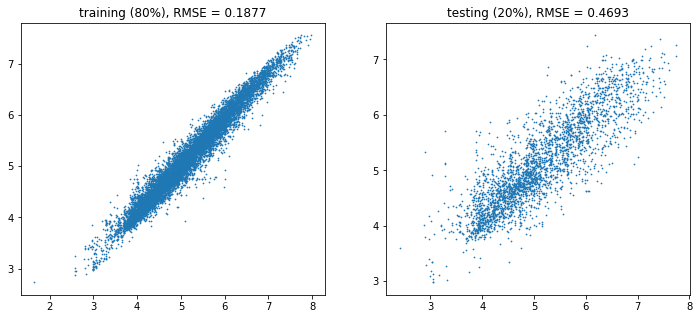

1
0.23641172071173666
training mse 0.03528405662418386


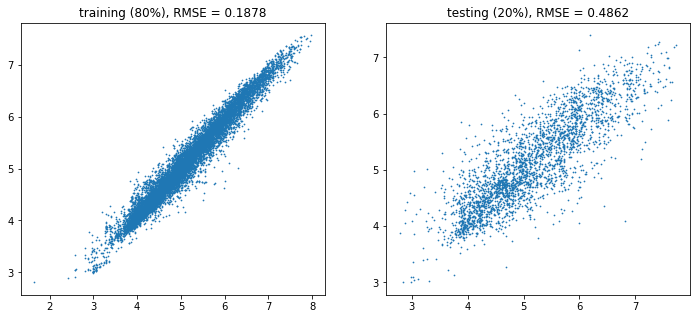

2


KeyboardInterrupt: 

In [152]:
for i in range(5):
    print(i)
    
    Xt2,Xv2,yt,yv= train_test_split(df_encoded, np.log10(df1['normalized_price']),test_size=0.2,random_state=11+i)

    reg = RandomForestRegressor(n_estimators=800,n_jobs=8)  
    reg.fit(Xt2, yt) 
    
    y_pred = reg.predict(Xv2)  
    mse = mean_squared_error(yv, y_pred )
    print(mse)

    y_pred_tr = reg.predict(Xt2)  
    print("training mse", mean_squared_error(yt, y_pred_tr ))
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.scatter(yt,y_pred_tr,s=0.5)
    plt.title('training (80%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yt, y_pred_tr )))
    plt.subplot(1, 2, 2)
    plt.scatter(yv,y_pred,s=0.5)
    plt.title('testing (20%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yv, y_pred )))
    plt.show()

0
0.2308575537523687
training mse 0.03688004666289793


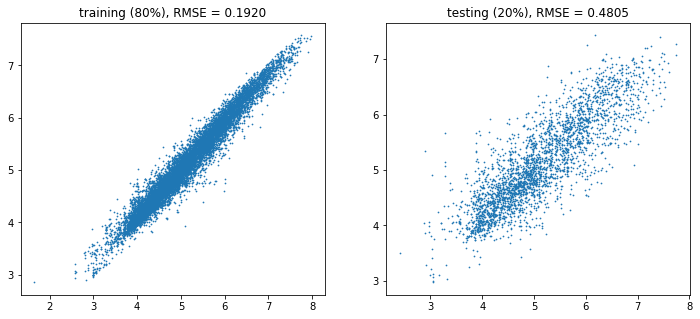

1
0.24886321559125515
training mse 0.03690008470477464


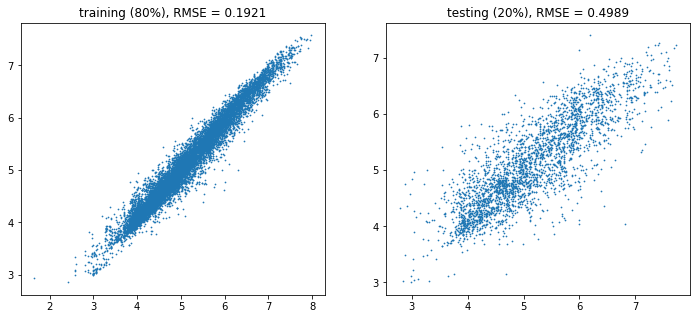

2
0.22988212513244857
training mse 0.03743197614604129


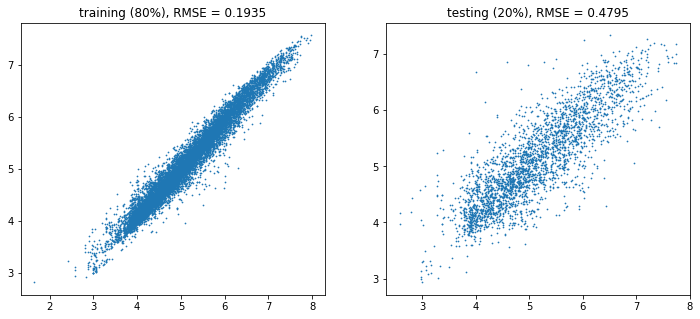

3
0.22510422563981033
training mse 0.037919872023802405


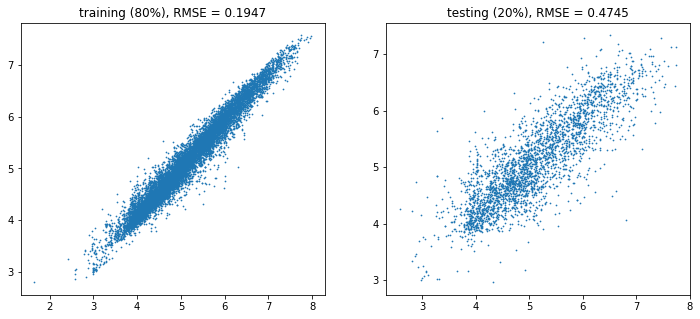

4
0.2313524258211934
training mse 0.037069037741972816


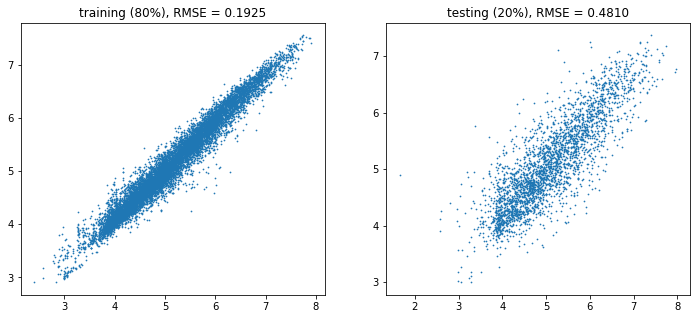

In [37]:
for i in range(5):
    print(i)
    
    Xt2,Xv2,yt,yv= train_test_split(df_encoded, np.log10(df1['normalized_price']),test_size=0.2,random_state=11+i)

    reg = RandomForestRegressor(n_estimators=1200,n_jobs=8)  
    reg.fit(Xt2, yt) 
    
    y_pred = reg.predict(Xv2)  
    mse = mean_squared_error(yv, y_pred )
    print(mse)

    y_pred_tr = reg.predict(Xt2)  
    print("training mse", mean_squared_error(yt, y_pred_tr ))
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.scatter(yt,y_pred_tr,s=0.5)
    plt.title('training (80%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yt, y_pred_tr )))
    plt.subplot(1, 2, 2)
    plt.scatter(yv,y_pred,s=0.5)
    plt.title('testing (20%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yv, y_pred )))
    plt.show()

0.22056644877164117
training mse 0.03517006623295834


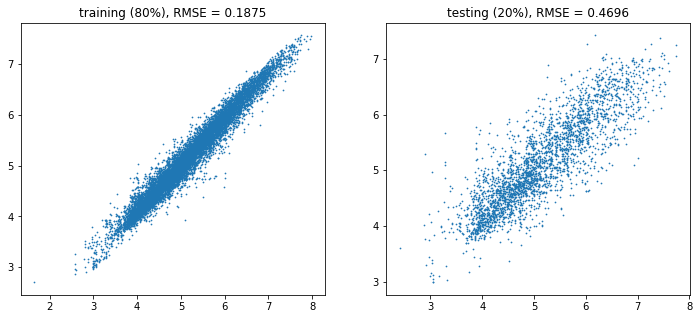

In [153]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

Xt2,Xv2,yt,yv= train_test_split(df_encoded, np.log10(df1['normalized_price']),test_size=0.2,random_state=11)

reg = RandomForestRegressor(n_estimators=800,n_jobs=8)  
reg.fit(Xt2, yt) 

y_pred = reg.predict(Xv2)  
mse = mean_squared_error(yv, y_pred )
print(mse)

y_pred_tr = reg.predict(Xt2)  
print("training mse", mean_squared_error(yt, y_pred_tr ))
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(yt,y_pred_tr,s=0.5)
plt.title('training (80%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yt, y_pred_tr )))
plt.subplot(1, 2, 2)
plt.scatter(yv,y_pred,s=0.5)
plt.title('testing (20%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yv, y_pred )))
plt.show()

perm_imp_rfpimp = permutation_importances(reg, Xt2, yt, r2)

[Text(0,0,'square'),
 Text(0,0,'provenancenum'),
 Text(0,0,'material'),
 Text(0,0,'style'),
 Text(0,0,'literaturenum'),
 Text(0,0,'exhibitednum'),
 Text(0,0,'feature1'),
 Text(0,0,'technique'),
 Text(0,0,'nationality'),
 Text(0,0,'framed'),
 Text(0,0,'century'),
 Text(0,0,'hasfollowers'),
 Text(0,0,'sex'),
 Text(0,0,'nazi')]

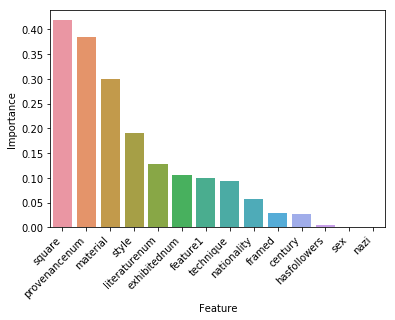

In [154]:
chart = sns.barplot(x="Feature", y="Importance", data=perm_imp_rfpimp.reset_index())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

0
0.38693498198196213
training mse 0.3834793202356591


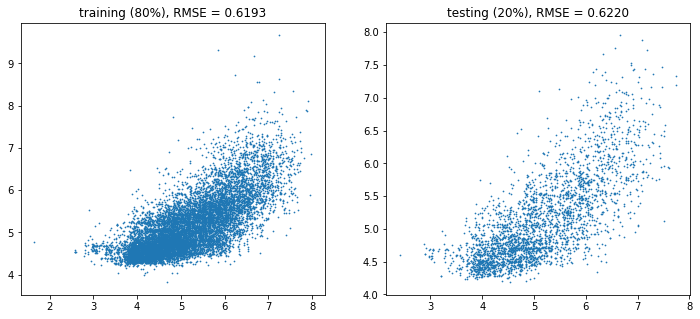

1
0.3982833101734859
training mse 0.3806301818610379


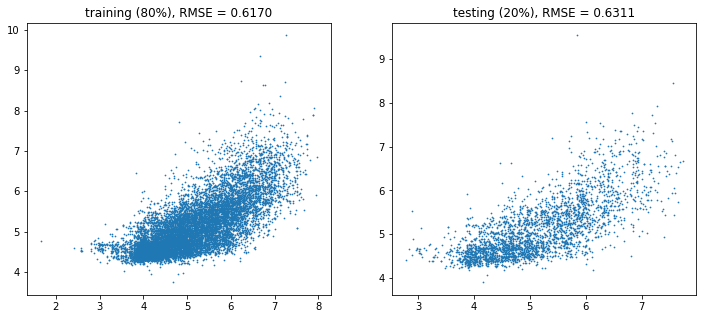

2
0.3842943928565585
training mse 0.38416073982905913


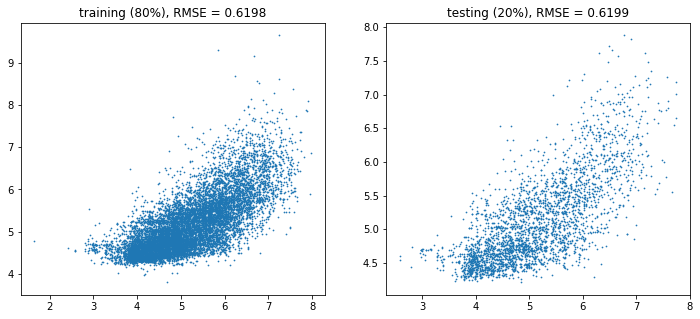

3
0.3807453013024774
training mse 0.3849848762393066


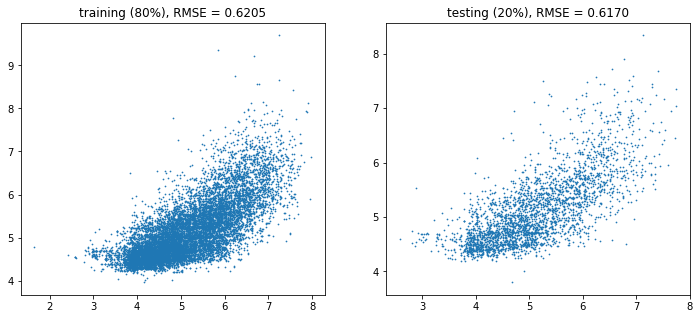

4
0.37604351038919026
training mse 0.3863389754243254


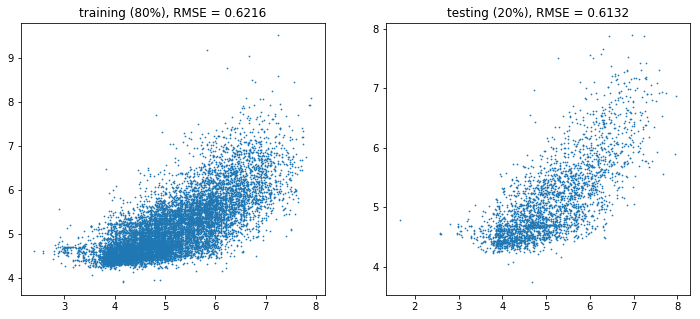

In [40]:
for i in range(5):
    print(i)
    
    Xt2,Xv2,yt,yv= train_test_split(df_encoded, np.log10(df1['normalized_price']),test_size=0.2,random_state=11+i)

    reg = LinearRegression()  
    reg.fit(Xt2, yt) 
    
    y_pred = reg.predict(Xv2)  
    mse = mean_squared_error(yv, y_pred )
    print(mse)

    y_pred_tr = reg.predict(Xt2)  
    print("training mse", mean_squared_error(yt, y_pred_tr ))
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.scatter(yt,y_pred_tr,s=0.5)
    plt.title('training (80%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yt, y_pred_tr )))
    plt.subplot(1, 2, 2)
    plt.scatter(yv,y_pred,s=0.5)
    plt.title('testing (20%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yv, y_pred )))
    plt.show()

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from group_lasso import GroupLasso
from group_lasso.utils import extract_ohe_groups

np.random.seed(42)
GroupLasso.LOG_LOSSES = True

In [60]:
arr_var = ['technique' ,'material','nazi','framed','exhibitednum','provenancenum','literaturenum','century','nationality','sex','style','feature1','hasfollowers']
X_cat = df1[arr_var]


In [43]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X_cat)
groups = extract_ohe_groups(ohe)
group_sizes = [np.sum(groups == g) for g in np.unique(groups)]


In [54]:
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11], dtype=object)

In [44]:
group_sizes

[16, 2, 2, 24, 23, 17, 8, 23, 2, 39, 19, 2]

In [47]:
y = np.log10(df1['normalized_price'].tolist())
y = y.reshape(-1, 1)

In [48]:
pipe = pipe = Pipeline(
    memory=None,
    steps=[
        (
            "variable_selection",
            GroupLasso(
                groups=groups,
                group_reg=0.1,
                l1_reg=0,
                scale_reg=None,
                supress_warning=True,
                n_iter=100000,
                frobenius_lipschitz=False,
            ),
        ),
        ("regressor", Ridge(alpha=1)),
    ],
)
pipe.fit(X, y)

/Users/alsemeno/anaconda3_video/envs/tensorflow3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Pipeline(memory=None,
         steps=[('variable_selection',
                 GroupLasso(fit_intercept=True, frobenius_lipschitz=None,
                            group_reg=0.1,
                            groups=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...
       9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11], dtype=object),
                            l1_reg=0, n_iter=100000, old_regularisation=False,
                            random_state=None, scale_reg=None,
                            subsampling_scheme=None, supress_warning=True,
                            tol=1e-05, warm_start=False)),
                ('regressor

In [49]:
# Extract from pipeline
yhat = pipe.predict(X)
sparsity_mask = pipe["variable_selection"].sparsity_mask_
coef = pipe["regressor"].coef_.T


R2 = r2_score(y, yhat)

# Print performance metrics
print(f"Number variables: {len(sparsity_mask)}")
print(f"Number of chosen variables: {sparsity_mask.sum()}")
print(f"R^2: {R2}")

Number variables: 177
Number of chosen variables: 56
R^2: 0.5258419569025607


In [50]:
sparsity_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [61]:
selected_vars = {}
for i, j in enumerate(pipe["variable_selection"].sparsity_mask_):
    if j == True:
        selected_vars[groups[i]] = True
for i in selected_vars:
    print(arr_var[i])

material
provenancenum
literaturenum


In [119]:
arr_var = ['material','nazi','framed','exhibitednum','provenancenum','literaturenum','century','nationality','sex','style','feature1','hasfollowers']
X_cat = df1[arr_var]
ohe = OneHotEncoder()
X = ohe.fit_transform(X_cat)
groups = extract_ohe_groups(ohe)


In [120]:
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11], dtype=object)

In [113]:
from scipy.sparse import hstack

In [114]:
X_new = hstack([X,np.array(df1['square_m']).reshape(14482,1)])

In [121]:
groups = list(groups) + [12]

In [122]:
groups

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 12]

In [123]:
pipe = pipe = Pipeline(
    memory=None,
    steps=[
        (
            "variable_selection",
            GroupLasso(
                groups=groups,
                group_reg=0.1,
                l1_reg=0,
                scale_reg=None,
                supress_warning=True,
                n_iter=100000,
                frobenius_lipschitz=False,
            ),
        ),
        ("regressor", Ridge(alpha=1)),
    ],
)
pipe.fit(X_new, y)


/Users/alsemeno/anaconda3_video/envs/tensorflow3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Pipeline(memory=None,
         steps=[('variable_selection',
                 GroupLasso(fit_intercept=True, frobenius_lipschitz=None,
                            group_reg=0.1,
                            groups=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                    0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...],
                            l1_reg=0, n_iter=100000, old_regularisation=False,
                            random_state=None, scale_reg=None,
                            subsampling_scheme=None, supress_warning=True,
                            tol=1e-05, warm_start=False)),
                ('regressor',
                 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [124]:
# Extract from pipeline
yhat = pipe.predict(X_new)
sparsity_mask = pipe["variable_selection"].sparsity_mask_
coef = pipe["regressor"].coef_.T


R2 = r2_score(y, yhat)

# Print performance metrics
print(f"Number variables: {len(sparsity_mask)}")
print(f"Number of chosen variables: {sparsity_mask.sum()}")
print(f"R^2: {R2}")

Number variables: 178
Number of chosen variables: 57
R^2: 0.5617046935108669


In [125]:
pipe["variable_selection"].sparsity_mask_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [190]:
model = smf.ols(formula='np.log(normalized_price) ~ C(material) + square_m + C(provenancenum) + C(literaturenum) + C(technique)', data=df[df.normalized_price != 0.0]).fit()

In [189]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(normalized_price)   R-squared:                       0.625
Model:                                  OLS   Adj. R-squared:                  0.622
Method:                       Least Squares   F-statistic:                     249.6
Date:                      Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                              16:15:57   Log-Likelihood:                -24164.
No. Observations:                     14482   AIC:                         4.852e+04
Df Residuals:                         14385   BIC:                         4.926e+04
Df Model:                                96                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      9.9957      0.661     15.131      0.000       8.701      11.291
C(material)[T.board]           1.5090      0.433      3.484      0.000       0.660       2.358
C(material)[T.canvas]          1.7844      0.432      4.131      0.000       0.938       2.631
C(material)[T.card]            1.3835      0.439      3.150      0.002       0.523       2.244
C(material)[T.gold]            0.5846      1.416      0.413      0.680      -2.191       3.360
C(material)[T.lamina]         -0.1490      1.008     -0.148      0.882      -2.125       1.827
C(material)[T.linen]           1.4948      0.452      3.306      0.001       0.609       2.381
C(material)[T.linoleum]        1.7227      0.443      3.886      0.000       0.854       2.592
C(material)[T.masonite]        0.1855      1.376      0.135      0.893      -2.511       2.882
C(material)[T.panel]           1.1976      0.437      2.739      0.006       0.340       2.055
C(material)[T.paper]           1.2939      0.430      3.009      0.003       0.451       2.137
C(material)[T.silk]            1.3907      1.013      1.373      0.170      -0.594       3.375
C(material)[T.tin]            -0.1929      1.009     -0.191      0.848      -2.170       1.784
C(material)[T.toile]           0.9972      0.442      2.256      0.024       0.131       1.864
C(material)[T.volant]          1.6544      0.580      2.854      0.004       0.518       2.791
C(material)[T.wood]           -1.6984      1.011     -1.681      0.093      -3.679       0.282
C(provenancenum)[T.1]          0.0213      0.044      0.482      0.630      -0.065       0.108
C(provenancenum)[T.2]          0.2216      0.044      5.045      0.000       0.135       0.308
C(provenancenum)[T.3]          0.3628      0.047      7.802      0.000       0.272       0.454
C(provenancenum)[T.4]          0.5467      0.051     10.710      0.000       0.447       0.647
C(provenancenum)[T.5]          0.7159      0.057     12.551      0.000       0.604       0.828
C(provenancenum)[T.6]          0.8801      0.065     13.637      0.000       0.754       1.007
C(provenancenum)[T.7]          0.8393      0.077     10.915      0.000       0.689       0.990
C(provenancenum)[T.8]          1.0040      0.094     10.672      0.000       0.820       1.188
C(provenancenum)[T.9]          0.9038      0.117      7.697      0.000       0.674       1.134
C(provenancenum)[T.10]         1.1683      0.127      9.179      0.000       0.919       1.418
C(provenancenum)[T.11]         0.8119      0.191      4.252      0.000       0.438       1.186
C(provenancenum)[T.12]         0.8907      0.223      3.988      0.000       0.453       1.328
C(provenancenum)[T.13]         0.6022      0.228      2.646      0.008  

In [128]:
model = smf.ols(formula='np.log(normalized_estimatefrom) ~ C(material) + C(nazi) +C(framed) + square_m + C(exhibitednum) + C(provenancenum) + C(literaturenum) + C(century) + C(nationality) + C(sex) + C(style) + C(feature1) + C(hasfollowers)', data=df[df.normalized_price != 0.0]).fit()

In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     np.log(normalized_estimatefrom)   R-squared:                       0.664
Model:                                         OLS   Adj. R-squared:                  0.661
Method:                              Least Squares   F-statistic:                     176.1
Date:                             Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                                     14:12:48   Log-Likelihood:                -23384.
No. Observations:                            14482   AIC:                         4.709e+04
Df Residuals:                                14320   BIC:                         4.832e+04
Df Model:                                      161                                         
Covariance Type:                         nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    6.0812      0.708      8.594      0.000       4.694       7.468
C(material)[T.board]                         1.9632      0.374      5.243      0.000       1.229       2.697
C(material)[T.canvas]                        2.8363      0.372      7.619      0.000       2.107       3.566
C(material)[T.card]                          1.5143      0.381      3.974      0.000       0.767       2.261
C(material)[T.gold]                          2.3725      1.296      1.831      0.067      -0.167       4.912
C(material)[T.lamina]                        0.9098      0.942      0.966      0.334      -0.936       2.756
C(material)[T.linen]                         2.2166      0.397      5.579      0.000       1.438       2.995
C(material)[T.linoleum]                      1.8148      0.385      4.714      0.000       1.060       2.569
C(material)[T.masonite]                      1.4965      1.284      1.165      0.244      -1.021       4.014
C(material)[T.panel]                         2.2326      0.380      5.869      0.000       1.487       2.978
C(material)[T.paper]                         1.3808      0.372      3.717      0.000       0.653       2.109
C(material)[T.silk]                          1.5753      0.955      1.649      0.099      -0.297       3.448
C(material)[T.tin]                           0.2958      0.955      0.310      0.757      -1.577       2.168
C(material)[T.toile]                         2.1843      0.381      5.729      0.000       1.437       2.932
C(material)[T.volant]                        1.8221      0.524      3.478      0.001       0.795       2.849
C(material)[T.wood]                         -0.9774      0.800     -1.222      0.222      -2.545       0.590
C(nazi)[T.1]                                 0.0006      0.136      0.004      0.997      -0.266       0.267
C(framed)[T.1]                              -0.0891      0.030     -2.932      0.003      -0.149      -0.030
C(exhibitednum)[T.1]                         0.3468      0.037      9.320      0.000       0.274       0.420
C(exhibitednum)[T.2]                         0.5012      0.049     10.290      0.000       0.406       0.597
C(exhibitednum)[T.3]                         0.7022      0.062     11.314      0.000       0.581       0.824
C(exhibitednum)[T.4]                         0.8116      0.070     11.545      0.000       0.674       0.949
C(exhibitednum)[T.5]                         0.6863      0.082      8.397      0.000       0.526       0.847
C(exhibitednum)[T.6]                         0.8234      0.094      8.731      0.000       0.639       1.0

In [130]:
model = smf.ols(formula='np.log(normalized_estimateto) ~ C(material) + C(nazi) +C(framed) + square_m + C(exhibitednum) + C(provenancenum) + C(literaturenum) + C(century) + C(nationality) + C(sex) + C(style) + C(feature1) + C(hasfollowers)', data=df[df.normalized_price != 0.0]).fit()

In [131]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(normalized_estimateto)   R-squared:                       0.665
Model:                                       OLS   Adj. R-squared:                  0.661
Method:                            Least Squares   F-statistic:                     176.3
Date:                           Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                                   14:13:13   Log-Likelihood:                -23351.
No. Observations:                          14482   AIC:                         4.703e+04
Df Residuals:                              14320   BIC:                         4.825e+04
Df Model:                                    161                                         
Covariance Type:                       nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    6.5541      0.706      9.283      0.000       5.170       7.938
C(material)[T.board]                         1.9773      0.374      5.293      0.000       1.245       2.710
C(material)[T.canvas]                        2.8409      0.371      7.649      0.000       2.113       3.569
C(material)[T.card]                          1.5203      0.380      3.998      0.000       0.775       2.266
C(material)[T.gold]                          2.4354      1.293      1.884      0.060      -0.099       4.969
C(material)[T.lamina]                        0.8635      0.940      0.919      0.358      -0.978       2.705
C(material)[T.linen]                         2.2093      0.396      5.573      0.000       1.432       2.986
C(material)[T.linoleum]                      1.8171      0.384      4.731      0.000       1.064       2.570
C(material)[T.masonite]                      1.4281      1.281      1.115      0.265      -1.083       3.939
C(material)[T.panel]                         2.2370      0.380      5.894      0.000       1.493       2.981
C(material)[T.paper]                         1.3879      0.371      3.744      0.000       0.661       2.114
C(material)[T.silk]                          1.5072      0.953      1.582      0.114      -0.361       3.375
C(material)[T.tin]                           0.3530      0.953      0.370      0.711      -1.515       2.221
C(material)[T.toile]                         2.1777      0.380      5.725      0.000       1.432       2.923
C(material)[T.volant]                        1.7565      0.523      3.361      0.001       0.732       2.781
C(material)[T.wood]                         -0.9012      0.798     -1.129      0.259      -2.465       0.663
C(nazi)[T.1]                                -0.0045      0.136     -0.033      0.974      -0.270       0.261
C(framed)[T.1]                              -0.0710      0.030     -2.342      0.019      -0.130      -0.012
C(exhibitednum)[T.1]                         0.3437      0.037      9.257      0.000       0.271       0.417
C(exhibitednum)[T.2]                         0.5015      0.049     10.319      0.000       0.406       0.597
C(exhibitednum)[T.3]                         0.7069      0.062     11.416      0.000       0.586       0.828
C(exhibitednum)[T.4]                         0.8093      0.070     11.538      0.000       0.672       0.947
C(exhibitednum)[T.5]                         0.6893      0.082      8.453      0.000       0.529       0.849
C(exhibitednum)[T.6]                         0.8212      0.094      8.727      0.000       0.637       1.006
C(exhibitednum)[T.7

0
0.2337569887318887
training mse 0.037064244718859995


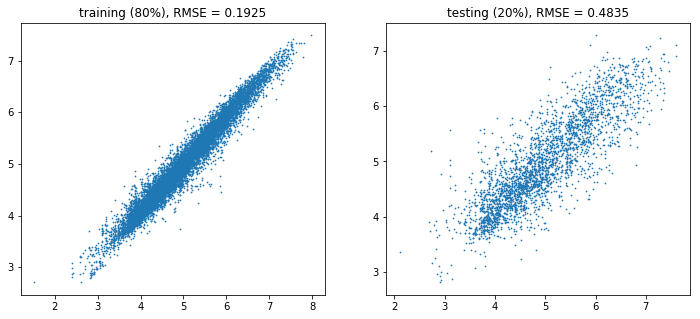

1
0.2494039000023939
training mse 0.03711945543166315


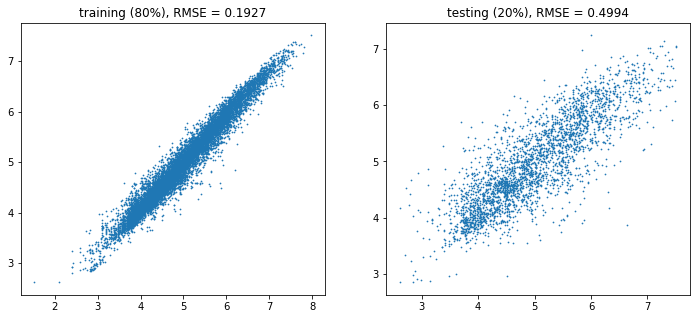

2
0.23221404205741186
training mse 0.03784569581933899


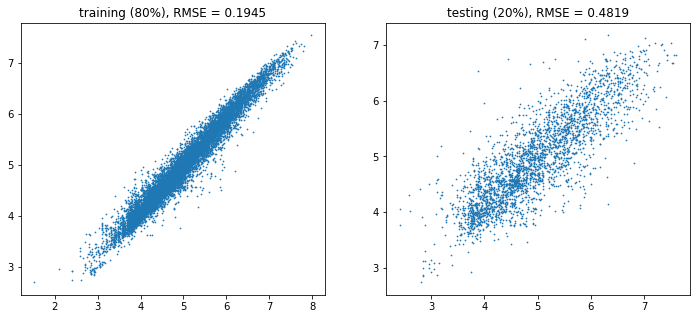

3
0.22518463659437205
training mse 0.03792424984400408


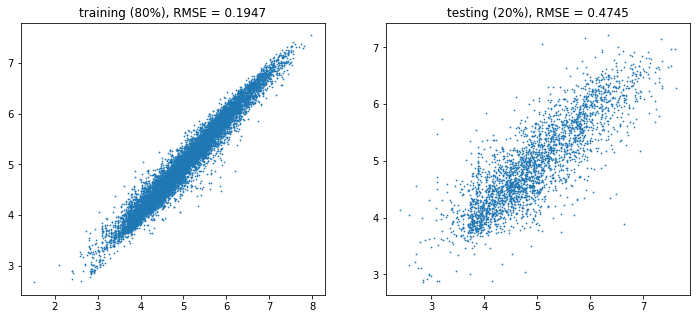

4
0.23195403993522057
training mse 0.03729734867022656


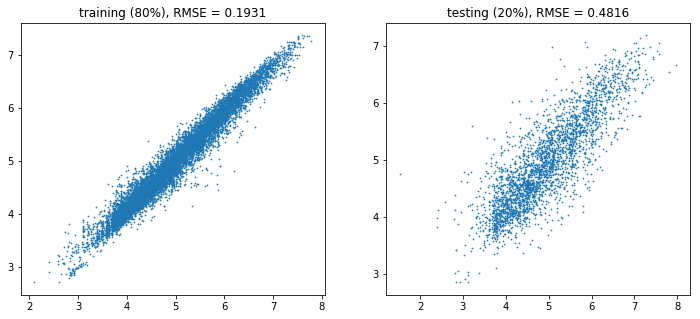

In [132]:
for i in range(5):
    print(i)
    
    Xt2,Xv2,yt,yv= train_test_split(df_encoded, np.log10(df1['normalized_estimatefrom']),test_size=0.2,random_state=11+i)

    reg = RandomForestRegressor(n_estimators=800,n_jobs=8)  
    reg.fit(Xt2, yt) 
    
    y_pred = reg.predict(Xv2)  
    mse = mean_squared_error(yv, y_pred )
    print(mse)

    y_pred_tr = reg.predict(Xt2)  
    print("training mse", mean_squared_error(yt, y_pred_tr ))
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.scatter(yt,y_pred_tr,s=0.5)
    plt.title('training (80%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yt, y_pred_tr )))
    plt.subplot(1, 2, 2)
    plt.scatter(yv,y_pred,s=0.5)
    plt.title('testing (20%%), RMSE = %.4f'%math.sqrt(mean_squared_error(yv, y_pred )))
    plt.show()

In [133]:
model = smf.ols(formula='np.log(normalized_price) ~ C(material) +C(framed) + square_m + C(exhibitednum) + C(provenancenum) + C(literaturenum) + C(century) + C(nationality) + C(sex) + C(style) + C(feature1) + C(hasfollowers) + np.log10(normalized_estimatefrom)', data=df[df.normalized_price != 0.0]).fit()

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(normalized_price)   R-squared:                       0.999
Model:                                  OLS   Adj. R-squared:                  0.999
Method:                       Least Squares   F-statistic:                 5.975e+04
Date:                      Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                              14:14:52   Log-Likelihood:                 15930.
No. Observations:                     14482   AIC:                        -3.153e+04
Df Residuals:                         14319   BIC:                        -3.030e+04
Df Model:                               162                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.5002      0.047     10.645      0.000       0.408       0.592
C(material)[T.board]                         0.0229      0.025      0.923      0.356      -0.026       0.072
C(material)[T.canvas]                        0.0172      0.025      0.698      0.485      -0.031       0.066
C(material)[T.card]                          0.0128      0.025      0.505      0.614      -0.037       0.062
C(material)[T.gold]                          0.0735      0.086      0.856      0.392      -0.095       0.242
C(material)[T.lamina]                       -0.0423      0.062     -0.678      0.498      -0.165       0.080
C(material)[T.linen]                         0.0026      0.026      0.101      0.920      -0.049       0.054
C(material)[T.linoleum]                      0.0104      0.026      0.409      0.683      -0.040       0.060
C(material)[T.masonite]                     -0.0617      0.085     -0.726      0.468      -0.228       0.105
C(material)[T.panel]                         0.0144      0.025      0.572      0.568      -0.035       0.064
C(material)[T.paper]                         0.0132      0.025      0.537      0.591      -0.035       0.061
C(material)[T.silk]                         -0.0610      0.063     -0.964      0.335      -0.185       0.063
C(material)[T.tin]                           0.0585      0.063      0.924      0.355      -0.066       0.182
C(material)[T.toile]                         0.0032      0.025      0.128      0.898      -0.046       0.053
C(material)[T.volant]                       -0.0574      0.035     -1.654      0.098      -0.125       0.011
C(material)[T.wood]                          0.0718      0.053      1.355      0.175      -0.032       0.176
C(nazi)[T.1]                                -0.0051      0.009     -0.563      0.573      -0.023       0.013
C(framed)[T.1]                               0.0177      0.002      8.785      0.000       0.014       0.022
C(exhibitednum)[T.1]                        -0.0016      0.002     -0.629      0.530      -0.006       0.003
C(exhibitednum)[T.2]                         0.0025      0.003      0.781      0.435      -0.004       0.009
C(exhibitednum)[T.3]                         0.0079      0.004      1.906      0.057      -0.000       0.016
C(exhibitednum)[T.4]                         0.0013      0.005      0.285      0.776      -0.008       0.011
C(exhibitednum)[T.5]                         0.0061      0.005      1.118      0.263      -0.005       0.017
C(exhibitednum)[T.6]                         0.0015      0.006      0.234      0.815      -0.011       0.014
C(exhibitednum)[T.7]                         0.0044      0.006      0.729 

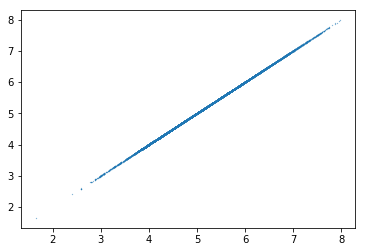

In [197]:
plt.scatter(np.log10(df[df.normalized_price != 0.0].normalized_estimateto), np.log10(df[df.normalized_price != 0.0].normalized_price), s = 0.05)

In [ ]:
model = smf.ols(formula='np.log(normalized_price) ~ C(material)  + square_m +  C(provenancenum) + C(literaturenum) + C(century) + C(nationality) + C(sex) + C(style) + C(feature1) + C(hasfollowers)', data=df[df.normalized_price != 0.0]).fit()

In [148]:
df.provenancenum.unique()

array([ 3,  5,  0, 12,  2,  6,  1,  4,  7,  8,  9, 10, 14, 21, 11, 13, 15,
       17, 20, 16, 19, 18, 24])

In [170]:
model = smf.ols(formula='np.log(normalized_price) ~ C(material) + C(nazi) +C(framed) + square_m + C(exhibitednum) + C(provenancenum) + C(literaturenum) + C(century) + C(nationality) + C(sex) + C(style) + C(feature1) + C(hasfollowers) + C(author) + C(technique) + C(city) + C(sign) + C(repeat_sale)', data=df[df.normalized_price != 0.0]).fit()

In [171]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(normalized_price)   R-squared:                       0.735
Model:                                  OLS   Adj. R-squared:                  0.730
Method:                       Least Squares   F-statistic:                     152.3
Date:                      Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                              16:09:16   Log-Likelihood:                -21644.
No. Observations:                     14481   AIC:                         4.381e+04
Df Residuals:                         14221   BIC:                         4.578e+04
Df Model:                               259                                         
Covariance Type:                  nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             5.3266      0.432     12.328      0.000       4.480       6.174
C(material)[T.board]                                  0.8096      0.385      2.100      0.036       0.054       1.565
C(material)[T.canvas]                                 1.3829      0.385      3.595      0.000       0.629       2.137
C(material)[T.card]                                   0.4911      0.390      1.259      0.208      -0.273       1.256
C(material)[T.gold]                                   0.0437      1.274      0.034      0.973      -2.453       2.541
C(material)[T.lamina]                                -1.2530      0.861     -1.454      0.146      -2.942       0.436
C(material)[T.linen]                                  1.0998      0.405      2.718      0.007       0.307       1.893
C(material)[T.linoleum]                               0.5825      0.396      1.472      0.141      -0.193       1.358
C(material)[T.masonite]                              -0.2949      1.164     -0.253      0.800      -2.576       1.986
C(material)[T.panel]                                  0.8423      0.391      2.155      0.031       0.076       1.608
C(material)[T.paper]                                  0.5749      0.383      1.503      0.133      -0.175       1.325
C(material)[T.silk]                                   0.7125      0.874      0.815      0.415      -1.001       2.426
C(material)[T.tin]                                   -0.7097      0.874     -0.812      0.417      -2.424       1.004
C(material)[T.toile]                                  0.9867      0.392      2.518      0.012       0.219       1.755
C(material)[T.volant]                                 1.4581      0.505      2.889      0.004       0.469       2.447
C(material)[T.wood]                                  -3.6628      0.863     -4.243      0.000      -5.355      -1.971
C(nazi)[T.1]                                         -0.0832      0.121     -0.685      0.493      -0.321       0.155
C(framed)[T.1]                                        0.0594      0.030      1.995      0.046       0.001       0.118
C(exhibitednum)[T.1]                                  0.2210      0.033      6.614      0.000       0.155       0.286
C(exhibitednum)[T.2]                                  0.3634      0.044      8.305      0.000       0.278       0.449
C(exhibitednum)[T.3]                                  0.6013      0.056     10.774      0.000       0.492       0.711
C(exhibitednum)[T.4]                                  0.6949      0.063     11.038      0.000       0.572       0.818
C(exhibitednum)[T.5]                                  0.6318      0

In [205]:
model = smf.ols(formula='np.log(normalized_price) ~ C(material) + C(nazi) +C(framed) + square_m + C(exhibitednum) + C(provenancenum) + C(literaturenum) + C(century) + C(nationality) + C(sex) + square_m*C(style) +C(style) + C(feature1) + C(feature2) + C(hasfollowers) + C(hasafter) + C(author) + C(city) + C(technique) + C(year) + C(year_sale)', data=df[df.normalized_price != 0.0]).fit()

In [206]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(normalized_price)   R-squared:                       0.754
Model:                                  OLS   Adj. R-squared:                  0.748
Method:                       Least Squares   F-statistic:                     138.2
Date:                      Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                              16:45:13   Log-Likelihood:                -21108.
No. Observations:                     14481   AIC:                         4.285e+04
Df Residuals:                         14166   BIC:                         4.523e+04
Df Model:                               314                                         
Covariance Type:                  nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             5.0439      0.399     12.631      0.000       4.261       5.827
C(material)[T.board]                                  0.8358      0.375      2.230      0.026       0.101       1.570
C(material)[T.canvas]                                 1.3188      0.374      3.526      0.000       0.586       2.052
C(material)[T.card]                                   0.5606      0.379      1.478      0.139      -0.183       1.304
C(material)[T.gold]                                   0.1729      1.247      0.139      0.890      -2.271       2.617
C(material)[T.lamina]                                -1.2857      0.834     -1.542      0.123      -2.920       0.348
C(material)[T.linen]                                  0.9062      0.395      2.292      0.022       0.131       1.681
C(material)[T.linoleum]                               0.5860      0.385      1.523      0.128      -0.168       1.340
C(material)[T.masonite]                              -0.0211      1.138     -0.019      0.985      -2.253       2.210
C(material)[T.panel]                                  0.8760      0.380      2.307      0.021       0.132       1.620
C(material)[T.paper]                                  0.5365      0.372      1.442      0.149      -0.193       1.266
C(material)[T.silk]                                   1.2549      0.850      1.476      0.140      -0.411       2.921
C(material)[T.tin]                                   -0.8269      0.846     -0.977      0.329      -2.486       0.832
C(material)[T.toile]                                  0.9106      0.381      2.389      0.017       0.164       1.658
C(material)[T.volant]                                 1.4160      0.490      2.892      0.004       0.456       2.376
C(material)[T.wood]                                  -3.2690      0.836     -3.909      0.000      -4.908      -1.630
C(nazi)[T.1]                                         -0.0536      0.117     -0.456      0.648      -0.284       0.177
C(framed)[T.1]                                        0.0799      0.029      2.739      0.006       0.023       0.137
C(exhibitednum)[T.1]                                  0.2090      0.032      6.456      0.000       0.146       0.272
C(exhibitednum)[T.2]                                  0.3095      0.042      7.297      0.000       0.226       0.393
C(exhibitednum)[T.3]                                  0.5540      0.054     10.229      0.000       0.448       0.660
C(exhibitednum)[T.4]                                  0.6081      0.061      9.965      0.000       0.488       0.728
C(exhibitednum)[T.5]                                  0.5766      0

In [200]:
df.sale_date = pd.to_datetime(df.sale_date)

In [204]:
df['year_sale'] = df.sale_date.dt.year